<a href="https://colab.research.google.com/github/gani88/ForecastingTimeSeries/blob/main/Forecasting_1_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting

This is my modified note based on the Kaggle Time Series Learn course (https://www.kaggle.com/learn/time-series). While it closely follows the content of the course, I've added my own insights and understanding to it.



## Time Series

1. Time Series: Imagine there exists a collection of data points, each associated with a specific time. This collection is called a "time series." For example, tracking the temperature every hour, with each temperature recorded alongside the time it was measured, we have a time series of temperature data.

2. Observations Over Time: Each data point in a time series represents an observation recorded at a particular moment in time. These observations could be anything we are measuring or tracking: sales numbers, stock prices, weather conditions, etc.

3. Regular Frequency: In many cases, these observations are recorded at regular intervals. For instance, if we tracking monthly sales figures or daily stock prices, we collecting data at a consistent frequency. This regularity helps in analyzing and understanding patterns in the data.

4. Forecasting Applications: Now, imagine we want to predict future values based on this historical data. This is where forecasting comes in. Using the patterns and trends observed in the historical data, we try to estimate what future values might be. For example, based on past sales data, we might want to predict how many units of a product we'll sell next month.

In summary, a time series is a collection of data points recorded over time, usually at regular intervals, and forecasting involves using this historical data to predict future values.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!apt-get install git
import os

!git clone https://github.com/gani88/ForecastingTimeSeries.git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'ForecastingTimeSeries'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 64 (delta 19), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (64/64), 2.86 MiB | 5.72 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [3]:
import pandas as pd

df = pd.read_csv('/content/ForecastingTimeSeries/Dataset/book_sales.csv', index_col='Date', parse_dates=['Date'])

In [4]:
df = df.drop(columns=['Paperback'])

The dataset captures the sales data of hardcover books from a retail store, spanning a period of 30 days.

It comprises two columns:


*   Date: This column serves as the index of the DataFrame, indicating the dates on which the sales were recorded. Each row corresponds to a specific date within the 30-day period.
*   Hardcover: This column contains the observations, representing the number of hardcover book sales recorded for each respective date.
The dataset's structure enables efficient time-series analysis, facilitating the examination of sales trends and patterns over the recorded period.




Parsing the 'Date' column as dates allows for temporal analysis, such as identifying trends over time, seasonality effects, and forecasting future sales based on historical patterns.

In [5]:
df

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


## Linear Regression with Time Series

1. **Linear Regression Overview**:
   - Linear regression is a simple but powerful algorithm used for prediction tasks, including forecasting.
   - It works by learning the relationship between input features and a target variable through a linear equation.

2. **Equation of Linear Regression**:
   - The basic equation of linear regression is:
     ```
     target = weight_1 * feature_1 + weight_2 * feature_2 + ... + weight_n * feature_n + bias
     ```
     - `target`: The variable we want to predict, also known as the target variable.
     - `feature_1`, `feature_2`, ..., `feature_n`: The input features or independent variables that influence the target variable.
     - `weight_1`, `weight_2`, ..., `weight_n`: The weights or coefficients assigned to each feature, representing their importance in predicting the target.
     - `bias`: Also known as the intercept, it represents the base value of the target variable when all features are zero. It adjusts the vertical position of the linear equation.

3. **Training Process**:
   - During training, the linear regression algorithm learns the values of the weights (`weight_1`, `weight_2`, ..., `weight_n`) and the bias (`bias`) that best fit the target variable based on the input features.
   - It does so by minimizing the squared error between the actual target values and the predicted values.
   - This process is often referred to as ordinary least squares, as it minimizes the sum of the squares of the differences between the actual and predicted values.

4. **Interpretation of Parameters**:
   - The weights (`weight_1`, `weight_2`, ..., `weight_n`) indicate the importance of each feature in predicting the target variable. Larger weights suggest stronger influence, while smaller weights suggest weaker influence.
   - The bias (`bias`) determines the starting point of the linear equation, indicating the value of the target variable when all input features are zero.

In summary, linear regression learns the relationship between input features and a target variable by fitting a linear equation to the data. It optimizes the weights and bias to minimize the error between actual and predicted values, making it a versatile and widely used algorithm for forecasting tasks.

### Time Step Features

1. **Time-step Features**:
   - Time-step features are characteristics or information derived directly from the time index of a time series.
   - They provide additional context about the progression of time within the series, which can be useful for forecasting models.

2. **Basic Time-step Feature: Time Dummy**:
   - The most fundamental time-step feature is the "time dummy."
   - This feature simply counts the time steps in the series from the beginning to the end.
   - It assigns a numerical value to each time step, typically starting from 1 and increasing sequentially.
   - Essentially, it indicates the position of each observation in the time series, helping the model understand the chronological order of the data.

In essence, time-step features like the time dummy provide the model with information about the temporal structure of the data, aiding in the prediction of future values based on historical patterns.


1. **Import NumPy**:
   - The code imports the NumPy library and assigns it the alias `np`.
   ```python
   import numpy as np
   ```

2. **Create Time Dummy**:
   - The `np.arange()` function generates a sequence of numbers from 0 to the length of the DataFrame's index.
   - Each number in the sequence represents a time step or position in the time series.
   - This sequence is then assigned to a new column named 'Time Dummy' in the DataFrame `df`.
   ```python
   df['Time Dummy'] = np.arange(len(df.index))
   ```

3. **View the DataFrame**:
   - The `head()` method is used to display the first few rows of the DataFrame `df` after adding the 'Time Dummy' column.
   ```python
   df.head()
   ```

In summary, this code creates a new column in the DataFrame `df` called 'Time Dummy', where each row contains a sequential number representing the position of that row in the time series. This column provides a simple time-step feature indicating the chronological order of the observations in the DataFrame.

In [6]:
import numpy as np

df['Time Dummy'] = np.arange(len(df.index))

df.head()

,Hardcover,Time Dummy
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4



1. **Linear Regression with Time Dummy**:
   - In this context, linear regression with the time dummy involves fitting a linear model to the time series data, where the independent variable (feature) is the time dummy.
   - The model equation is expressed as:
     ```
     target = weight * time + bias
     ```
     - `target`: The variable we want to predict.
     - `time`: The time dummy variable representing the sequential order of observations in the time series.
     - `weight` and `bias`: The parameters of the linear regression model, which are learned during the training process to minimize the error between the actual and predicted values.

2. **Fitting Curves to Time Series**:
   - By using linear regression with the time dummy, we can fit curves to the time series data when plotted over time.
   - In a time plot, the x-axis represents time, and the y-axis represents the target variable.
   - The linear regression model allows us to draw a straight line (or curve, depending on the complexity of the model) that best fits the observed data points over time.
   - The time dummy variable, being a simple representation of time steps, enables us to visualize the trend or pattern in the data and make predictions based on the learned model.

In essence, linear regression with the time dummy helps us model the relationship between the target variable and time, allowing us to analyze trends and make predictions for future time points. When plotted, it enables us to visualize how the target variable changes over time and how well the linear regression model captures this behavior.

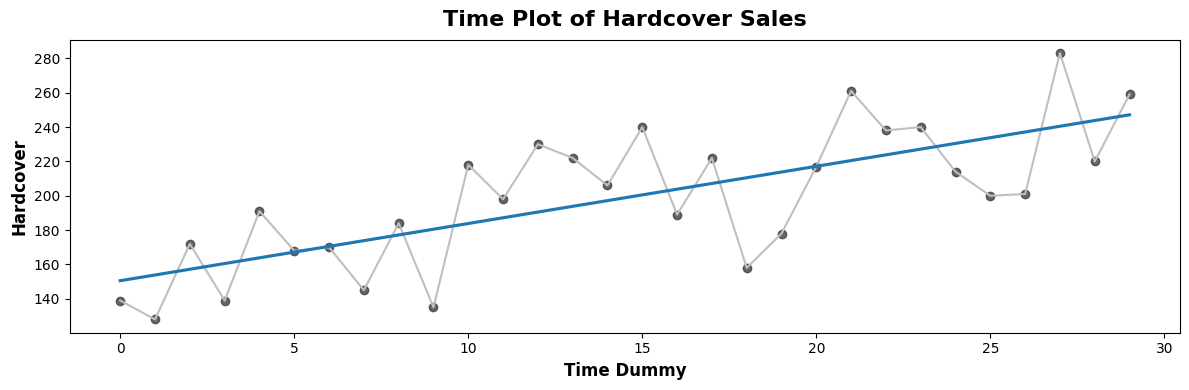

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc(
    "figure",
    autolayout=True,
    figsize=(12,4),
    titlesize=18,
    titleweight='bold'
)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)

fig, ax = plt.subplots()
ax.plot('Time Dummy', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time Dummy', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

Time-step features enable you to capture the relationship between data points based on their timing or sequence. A dataset is said to have time dependence if the values of the data can be anticipated or forecasted by considering the time at which they occurred.

For instance, let's consider the Hardcover Sales series. This refers to a set of data representing sales of hardcover books over a period of time, like a month. Now, if you find that you can predict how many hardcover books will be sold later in the month based on the time within the month, then the data has time dependence.

### Lag Features

Lag features are created by shifting the observations of a series, usually the target variable, so that they appear as if they happened at a later time. In simpler terms, you're "lagging" the data points by moving them forward in time. This technique is valuable in time series analysis and forecasting.

In summary, lag features allow you to capture past behavior and use it as a predictor for future behavior. They're created by shifting the values of a series forward in time, making them appear as if they occurred later. This technique is essential in time series analysis and forecasting as it helps incorporate historical trends into predictive models.

In [ ]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])

df.head(10)

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


Linear regression with a lag feature results in a model that can be represented as:


---


**target** = weight * lag + bias

Here's what each component means:


* **target**: This is the value you're trying to predict or understand, often referred to as the dependent variable.
* **lag**: This refers to the lagged feature, which is a value taken from a previous time step. In this context, it's the value of the target variable at a specific lagged time point.
* **weight**: This is the coefficient that signifies the strength of the relationship between the lag and the target. It indicates how much the target value changes for each unit change in the lagged value.
* **bias**: Also known as the intercept, this is a constant term that accounts for any baseline value in the target variable, even when the lag is 0.

---

In simpler terms, the linear regression model is learning how the target variable changes based on the lag feature.

Now, why is this significant? The lag feature enables us to create curves that fit the patterns in lag plots. A lag plot is a graphical representation where each observation in a series is plotted against the previous observation. This visual representation helps us understand the relationship between the current value and the previous value.

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

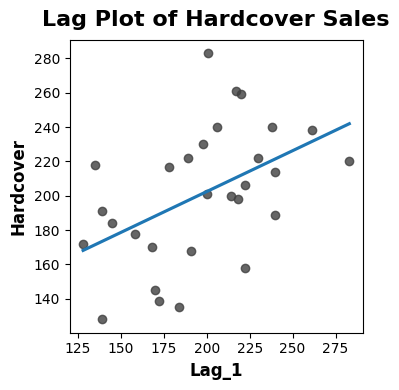

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

**Lag Plot and Correlation:**

In a lag plot, we can visually represent data points against their previous data points. In the context of sales data, if you plot the sales of one day against the sales of the previous day, you might notice a pattern. For instance, if higher sales on one day are associated with higher sales on the next day, there's a visible correlation. This means that the sales from one day seem to influence the sales from the next day.

**Serial Dependence and Time Series:**

More broadly, lag features allow you to capture what's known as serial dependence in time series data. This serial dependence indicates that the current observation can be predicted based on previous observations. In Hardcover sales example, when you have a strong correlation between sales on consecutive days, it implies that the sales pattern is somewhat consistent over time. This information is crucial for making accurate predictions.

## Another Example

This example will use another dataset from kaggle (also this example is from kaggle, I'm just reiterate again in here + add some explanation)


In [ ]:
# Matplotlib default
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(12,5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)

<ipython-input-11-8c9325b75cbb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
data_tunnel = "/content/tunnel.csv"
tunnel = pd.read_csv(data_tunnel, parse_dates=["Day"])
tunnel = tunnel.set_index("Day")

In [ ]:
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [ ]:
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


### Time-step feature

In [ ]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


Will fitting it for linear regression using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

# Data training
X = df.loc[:, ['Time']] #features
y = df.loc[:, 'NumVehicles'] #target

# Training the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In summary, the code segment uses the Scikit-Learn library to perform linear regression. It trains a linear regression model using the 'Time' column as the feature and the 'NumVehicles' column as the target from the DataFrame df. The trained model is then used to make predictions on the same feature data, and the predicted values are stored in the y_pred Series, maintaining the original time index.

In [ ]:
result_df = pd.DataFrame(index=X.index)
result_df['X'] = X['Time']
result_df['y'] = y
result_df['y_pred'] = y_pred

result_df.index = X.index

In [ ]:
result_df.head(65)

,X,y,y_pred
Day,,,
2003-11-01,0,103536,98176.206344
2003-11-02,1,92051,98198.703794
2003-11-03,2,100795,98221.201243
2003-11-04,3,102352,98243.698693
2003-11-05,4,106569,98266.196142
...,...,...,...
2003-12-31,60,69097,99526.053316
2004-01-01,61,53098,99548.550766
2004-01-02,62,62895,99571.048215


Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

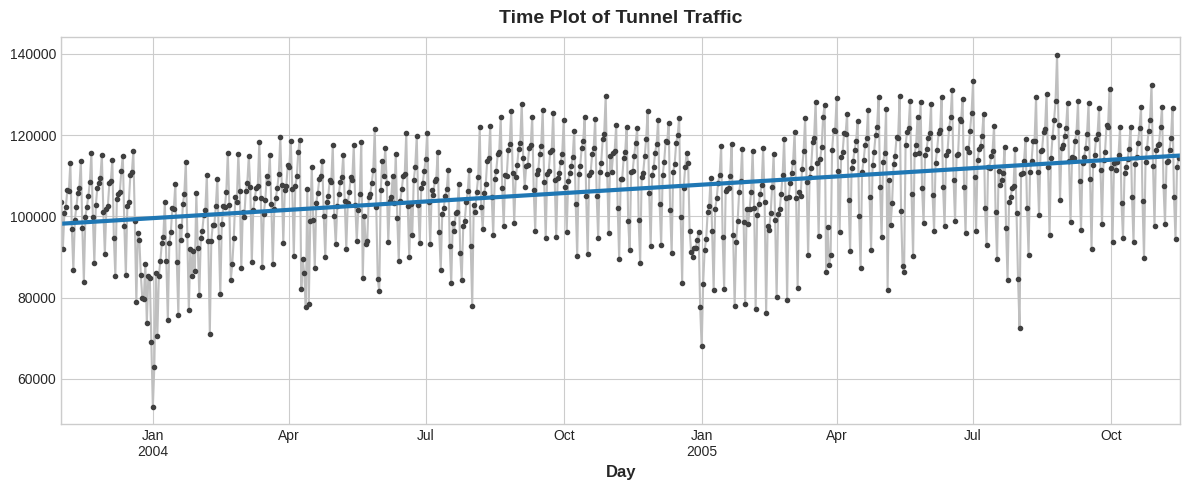

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

### Lag Feature

In [ ]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [ ]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = df.loc[:, 'NumVehicles']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
result_lag = pd.DataFrame(index=X.index)
result_lag['X'] = X['Lag_1']
result_lag['y'] = y
result_lag['y_pred'] = y_pred

result_lag.index = X.index

In [ ]:
result_lag.head()

,X,y,y_pred
Day,,,
2003-11-02,103536.0,92051,104961.799284
2003-11-03,92051.0,100795,98840.684037
2003-11-04,100795.0,102352,103500.939302
2003-11-05,102352.0,106569,104330.767464
2003-11-06,106569.0,106284,106578.285356


Now we will plot it to see relationship between number of vehicles one day and the previous day

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

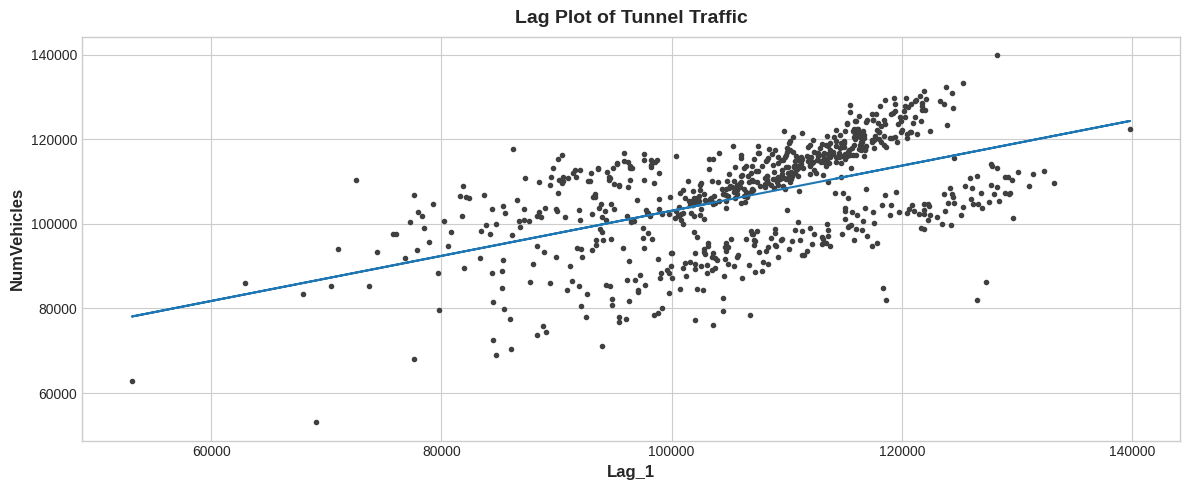

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

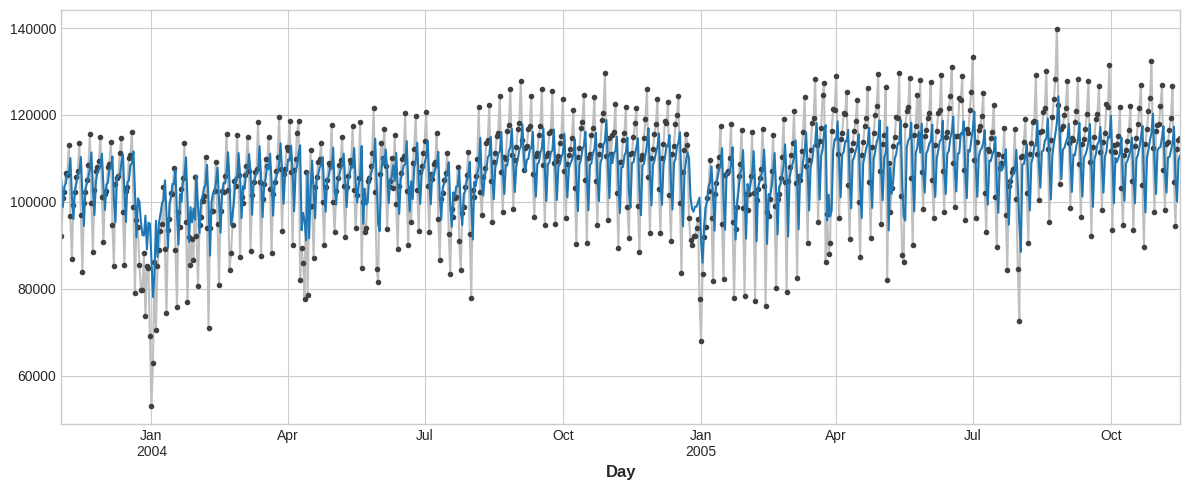

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax)

# Exercise
This exercise is from Kaggle

In [ ]:
ar = pd.read_csv('/content/ar.csv')

Text(0.5, 1.0, 'Series 2')

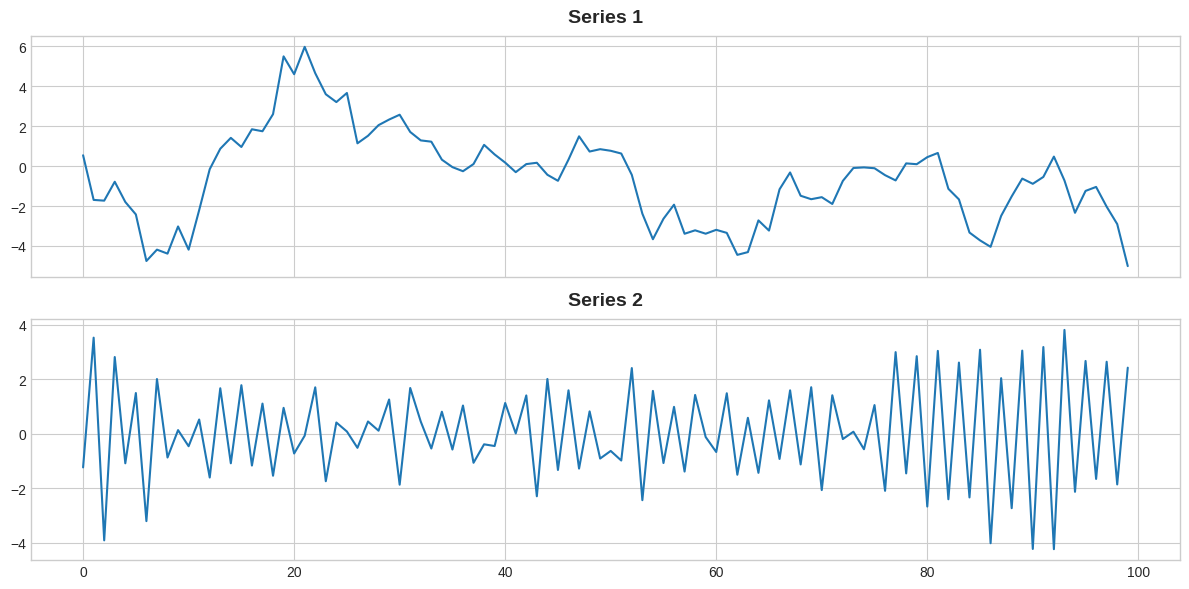

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2')